<a href="https://colab.research.google.com/github/lokwong97/Week_2_Project/blob/main/Matthew_Wong_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
# Fetch the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_largest_banks'
response = requests.get(url)

# Parse the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing bank data
table = soup.find('table', {'class': 'wikitable'})


In [12]:
# Convert the table data into a pandas DataFrame
data = pd.read_html(str(table))
df = data[0]

# Rename the columns for easier access
df.columns = ['Rank', 'Bank name', 'Market cap (US$ billion)']

# Remove unwanted characters from 'Market cap' and convert to numeric
df['Market cap (US$ billion)'] = df['Market cap (US$ billion)'].replace('[\$,]', '', regex=True).astype(float)

# Display the DataFrame
print(df)

# Sort the DataFrame by 'Market cap' in ascending order
df = df.sort_values('Market cap (US$ billion)')


   Rank                                Bank name  Market cap (US$ billion)
0     1                           JPMorgan Chase                    419.25
1     2                          Bank of America                    231.52
2     3  Industrial and Commercial Bank of China                    194.56
3     4               Agricultural Bank of China                    160.68
4     5                                HDFC Bank                    157.91
5     6                              Wells Fargo                    155.87
6     7                        HSBC Holdings PLC                    148.90
7     8                           Morgan Stanley                    140.83
8     9                  China Construction Bank                    139.82
9    10                            Bank of China                    136.81


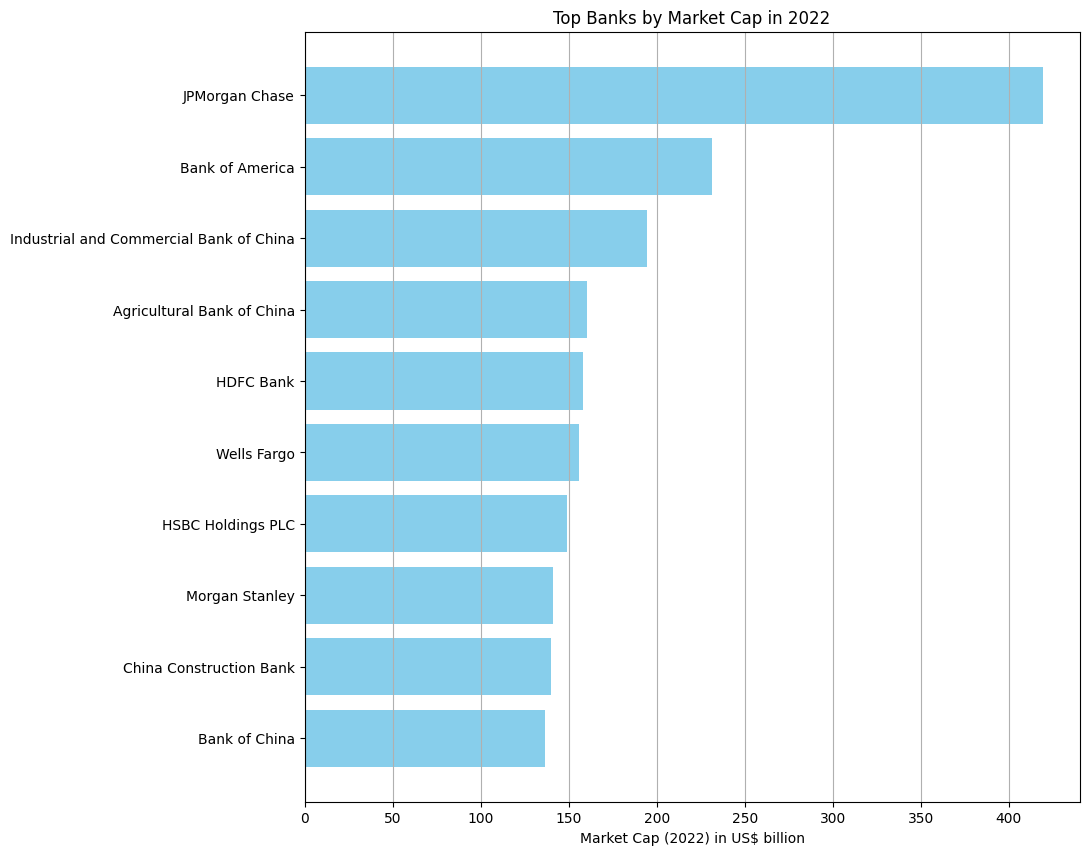

In [11]:
# Plotting the graph
plt.figure(figsize=(10, 10))
plt.barh(df['Bank name'], df['Market cap (US$ billion)'], color='skyblue')
plt.xlabel('Market Cap (2022) in US$ billion')
plt.title('Top Banks by Market Cap in 2022')
plt.grid(axis='x')

plt.show()

In [20]:
# Extract the second table
table = tables[1]

# Convert the table data into a pandas DataFrame
data = pd.read_html(str(table))
df = data[0]


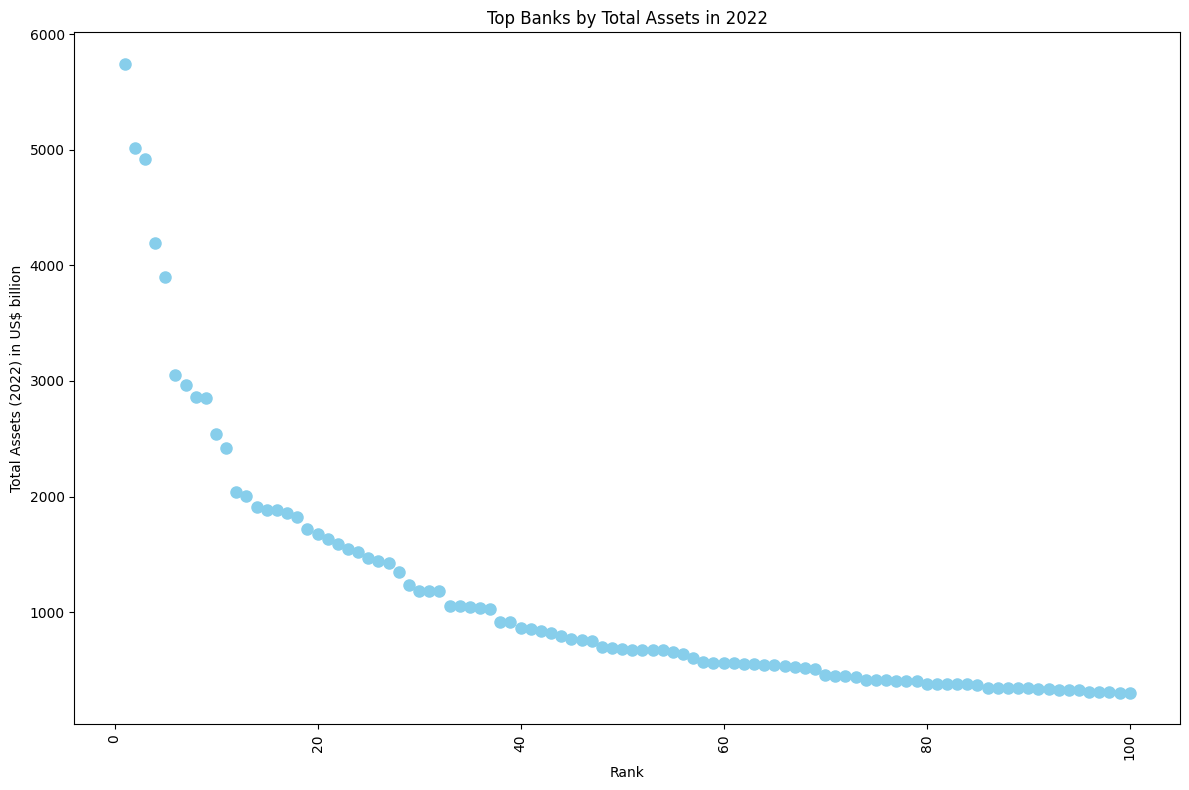

In [22]:
# Set the column names explicitly
df.columns = ['Rank', 'Bank name', 'Total assets (2022)(US$ billion)']

# Remove rows with missing data
df = df.dropna()

# Plotting the dot graph with Rank as x-labels
plt.figure(figsize=(12, 8))
plt.plot(df['Rank'], df['Total assets (2022)(US$ billion)'], marker='o', linestyle='', markersize=8, color='skyblue')
plt.xlabel('Rank')
plt.ylabel('Total Assets (2022) in US$ billion')
plt.title('Top Banks by Total Assets in 2022')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [33]:
# Find the table containing 'Number of banks in the top 100 by total assets
table = soup.find_all('table', {'class': 'wikitable'})[2]

# Convert the table data into a pandas DataFrame
data = pd.read_html(str(table))
df = data[0]



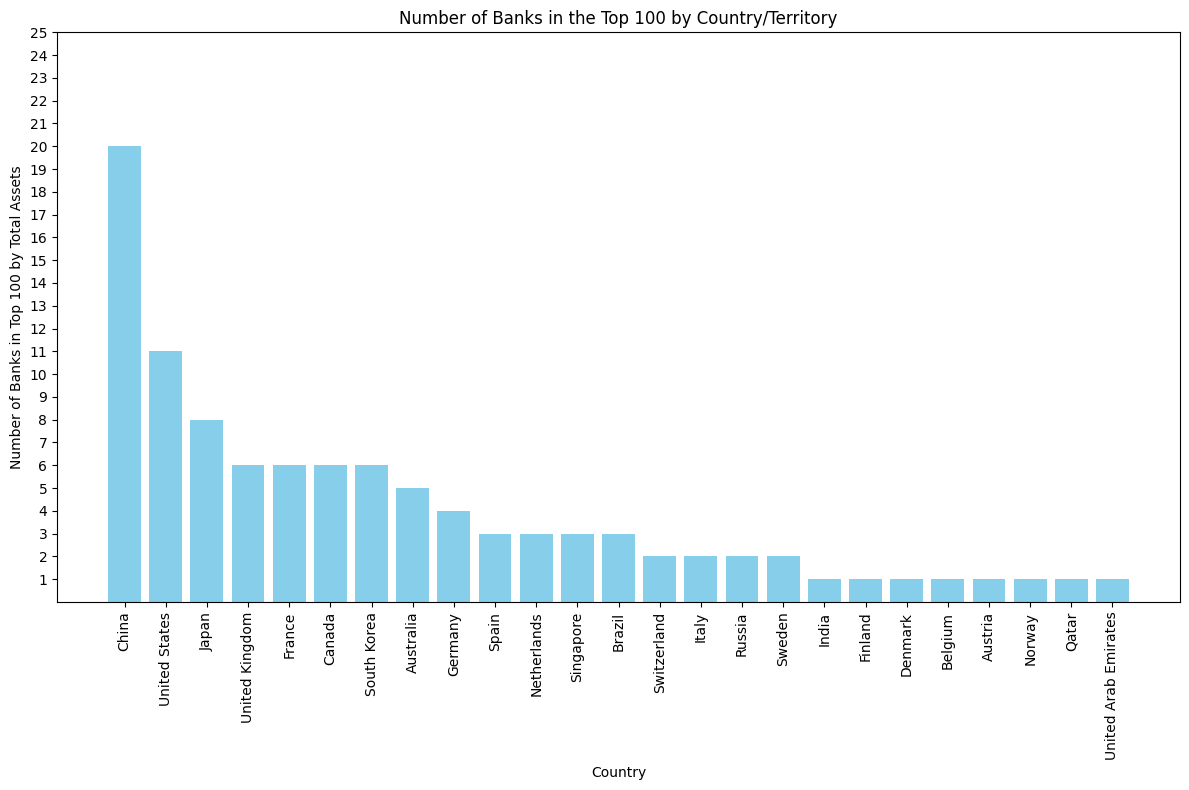

In [32]:
# Assigning column names directly
df.columns = ['Rank', 'Country', 'Number']

# Filtering out rows with inappropriate data (if any)
df = df[df['Number'].astype(str).str.isnumeric()]

# Converting 'Number' column to numeric
df['Number'] = pd.to_numeric(df['Number'])

# Plotting the bar plot
plt.figure(figsize=(12, 8))
plt.bar(df['Country'], df['Number'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Banks in Top 100 by Total Assets')
plt.title('Number of Banks in the Top 100 by Country/Territory')
plt.xticks(rotation=90)
plt.yticks(range(1, 26))
plt.tight_layout()
plt.show()